In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio

### Load Data

In [12]:
df = pd.read_csv('CarsData.csv')

### Data Exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [14]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,97712.0,2017.066502,2.118661,1970.0,2016.0,2017.0,2019.0,2024.0
price,97712.0,16773.487555,9868.552222,450.0,9999.0,14470.0,20750.0,159999.0
mileage,97712.0,23219.475499,21060.882301,1.0,7673.0,17682.5,32500.0,323000.0
tax,97712.0,120.142408,63.357250,0.0,125.0,145.0,145.0,580.0
mpg,97712.0,55.205623,16.181659,0.3,47.1,54.3,62.8,470.8
engineSize,97712.0,1.664913,0.558574,0.0,1.2,1.6,2.0,6.6


#### Null Data

In [16]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

#### Duplicate Data

In [38]:
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer


#### Unique Data

In [18]:
for c in df.columns:
    print(f"{c}: {len(df[c].unique())}")

model: 196
year: 27
price: 13236
transmission: 4
mileage: 42214
fuelType: 5
tax: 48
mpg: 208
engineSize: 40
Manufacturer: 9


#### Distribution of Data

In [37]:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()

num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\D

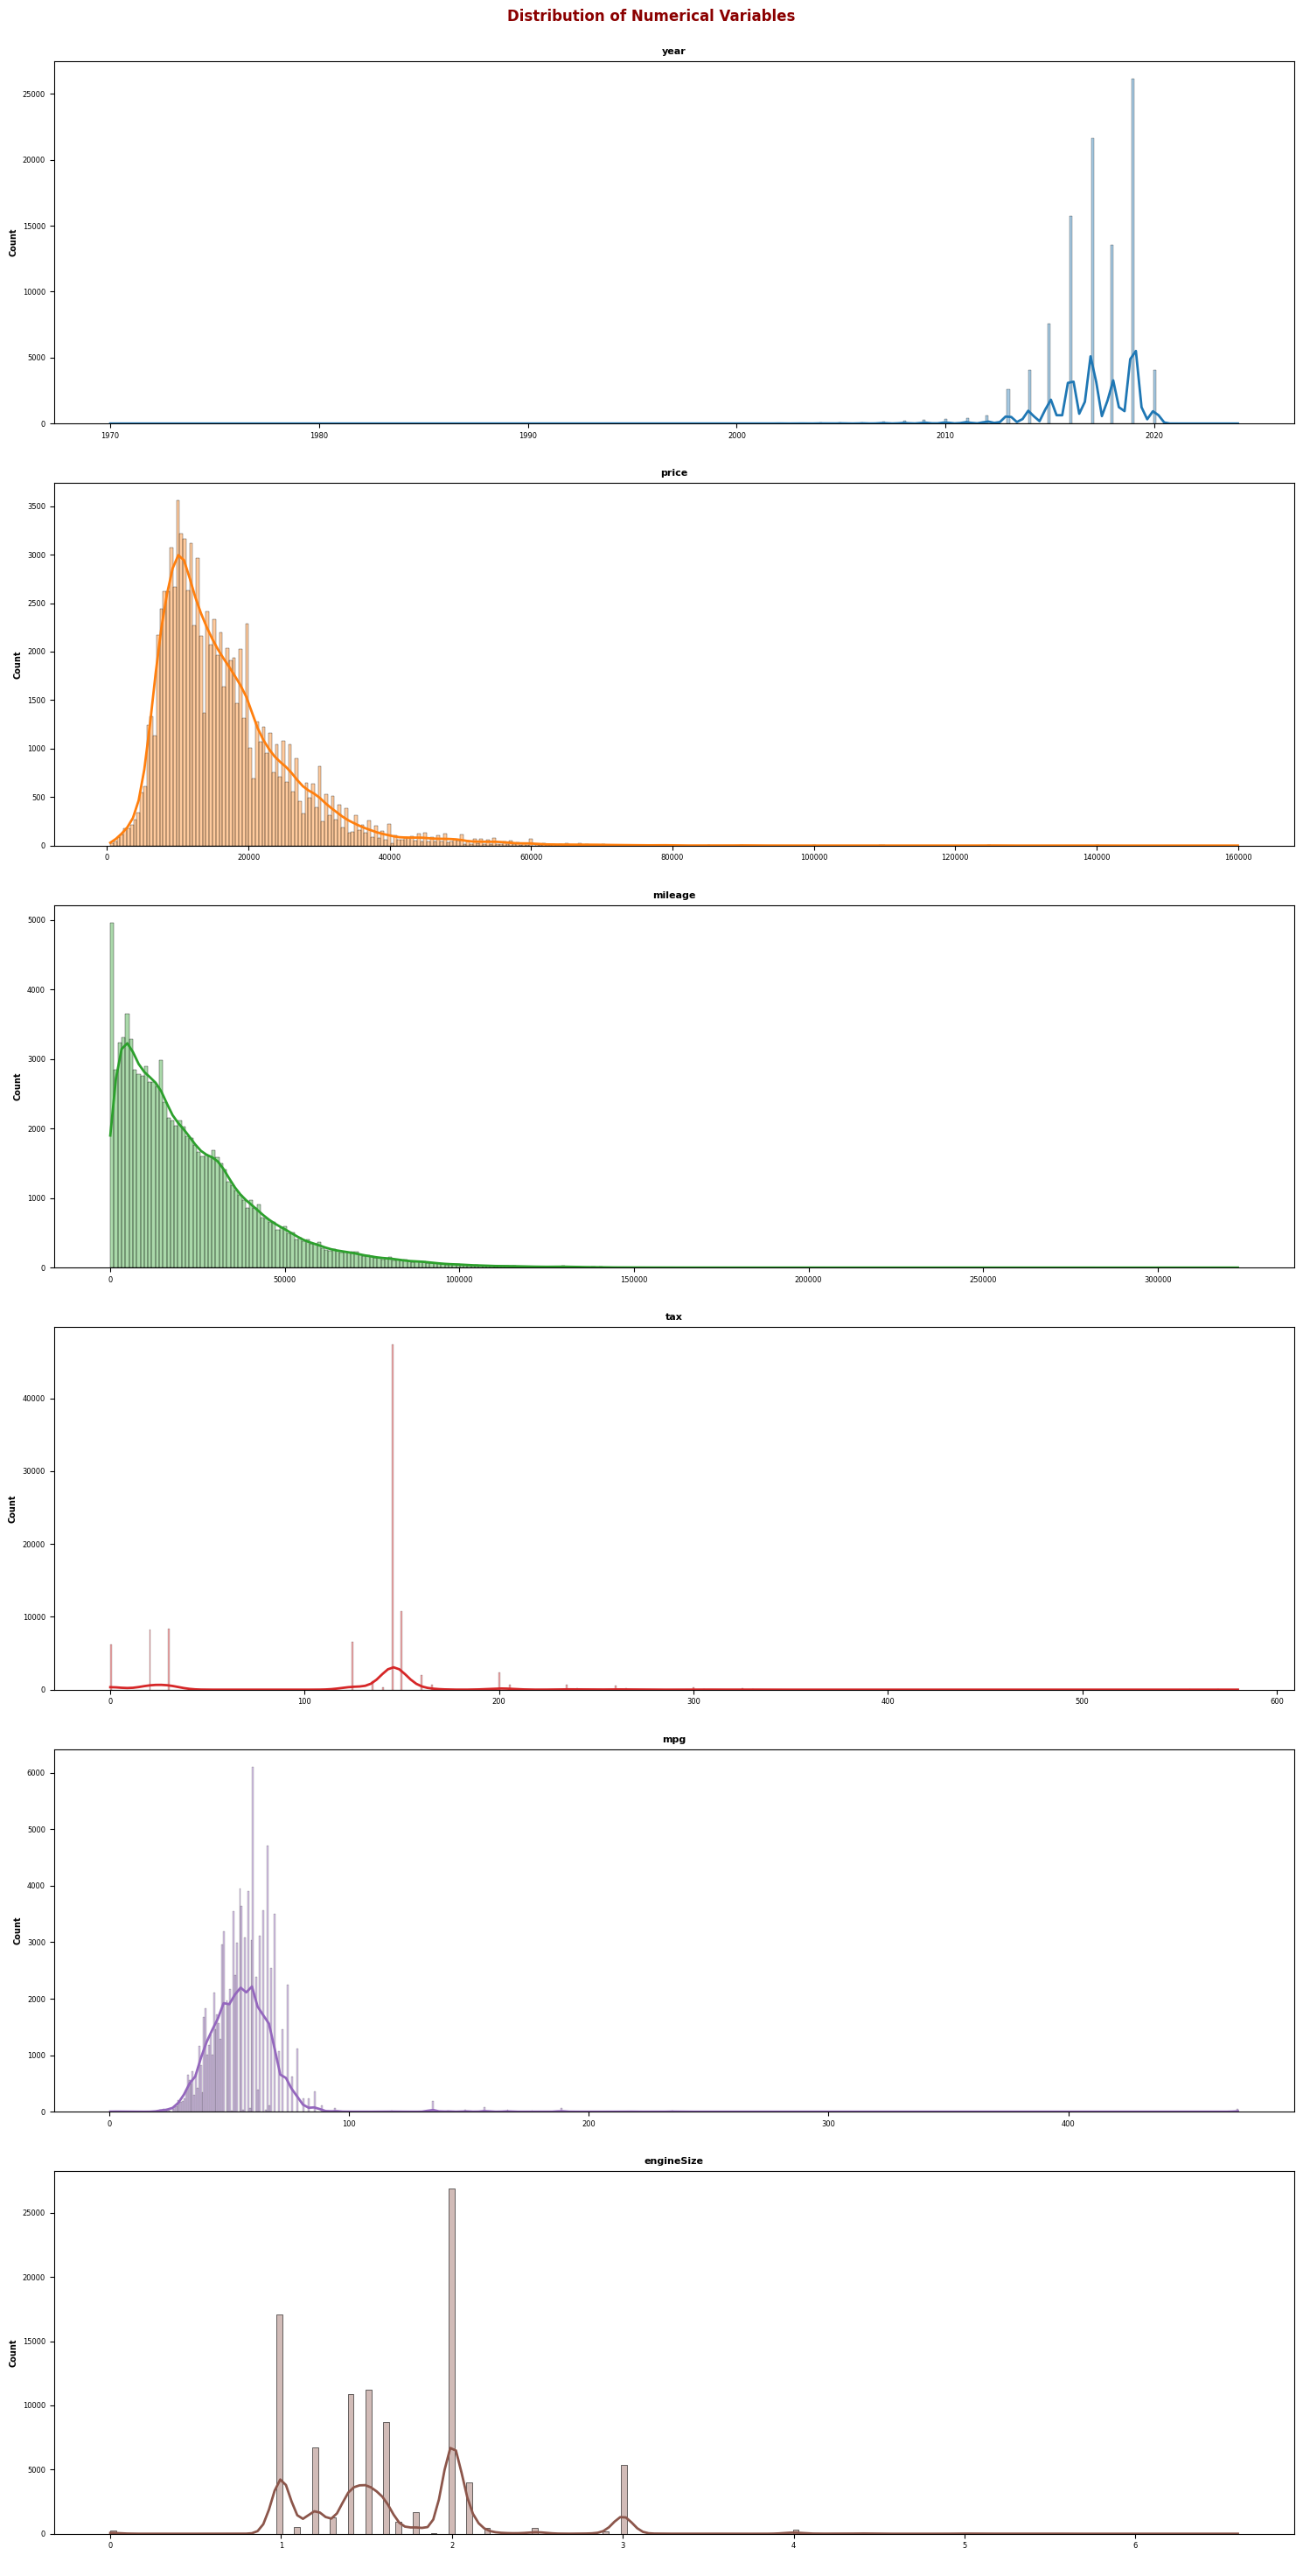

In [36]:
num_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


fig, axes = plt.subplots(len(num_cols), 1, figsize=(15, 30))
axes = axes.flat

for i, num_col in enumerate(num_cols):
    sns.histplot(df,
                 x=num_col,
                 stat='count',
                 kde=True,
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 line_kws={'linewidth': 2},
                 alpha=0.4,
                 ax=axes[i])

    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize=7, fontweight='bold', color='black')
    axes[i].set_title(num_col, fontsize=8, fontweight='bold', color='black')
    axes[i].tick_params(labelsize=6)

if len(num_cols) < len(axes):
    fig.delaxes(axes[-1])

fig.suptitle('Distribution of Numerical Variables', fontsize=12, fontweight='bold', color='darkred')
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.show()


C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_2380\3694609110.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_2380\3694609110.py:37: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_2380\3694609110.py:55: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_2380\3694609110.py:72: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_2380\3694609110.py:55: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_2380\3694609110.py:72: UserWarning:

FigureCanvasAgg is non-i

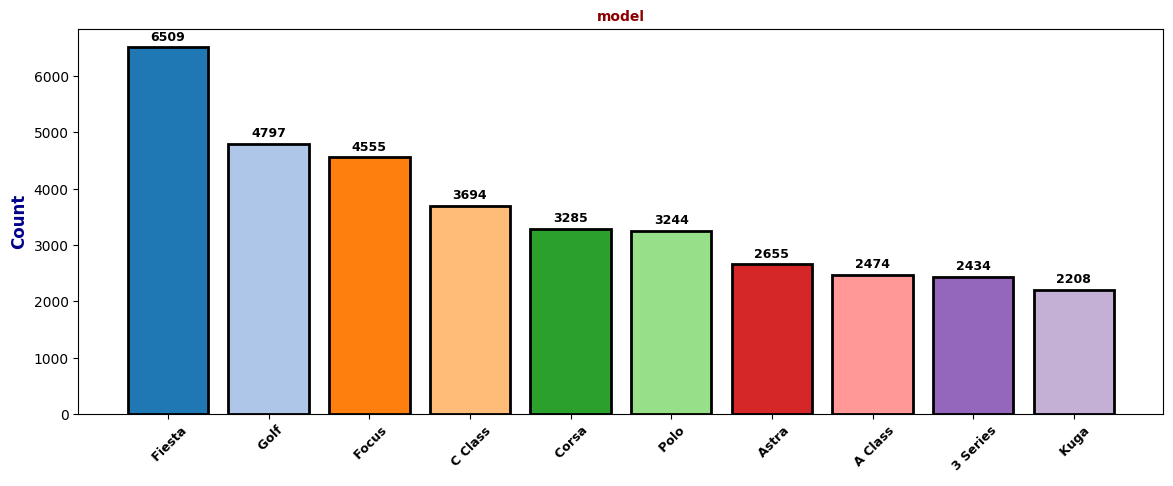

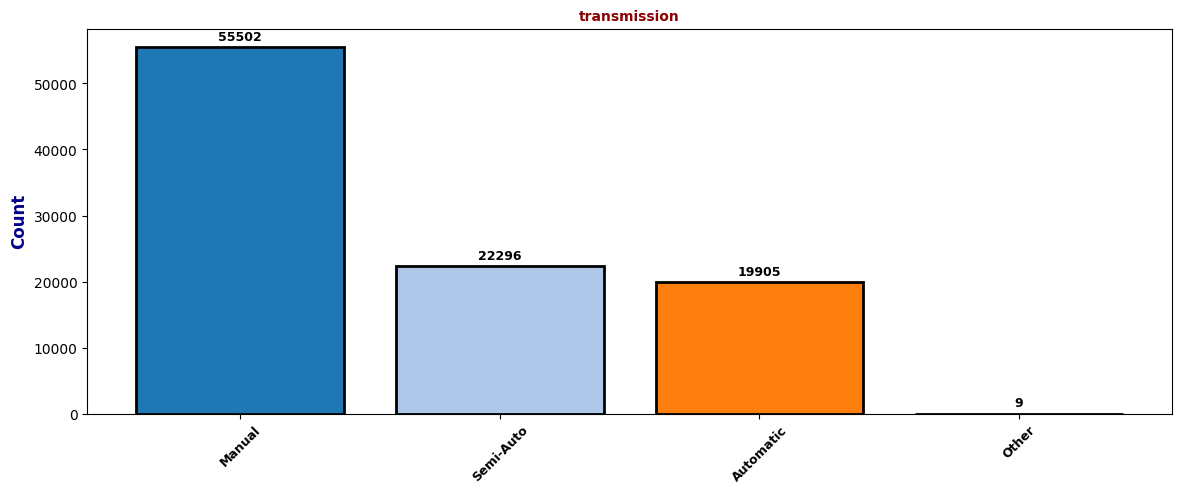

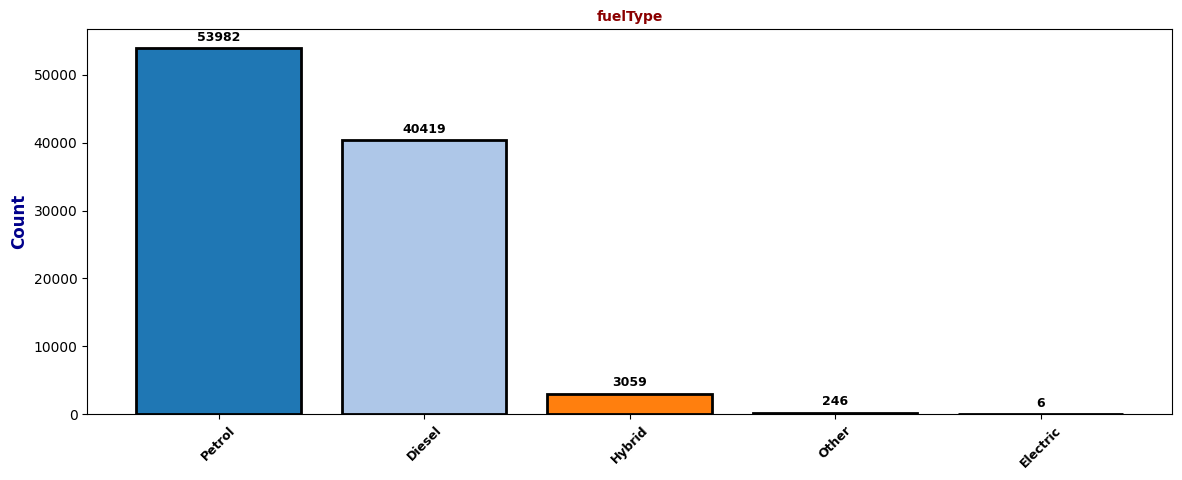

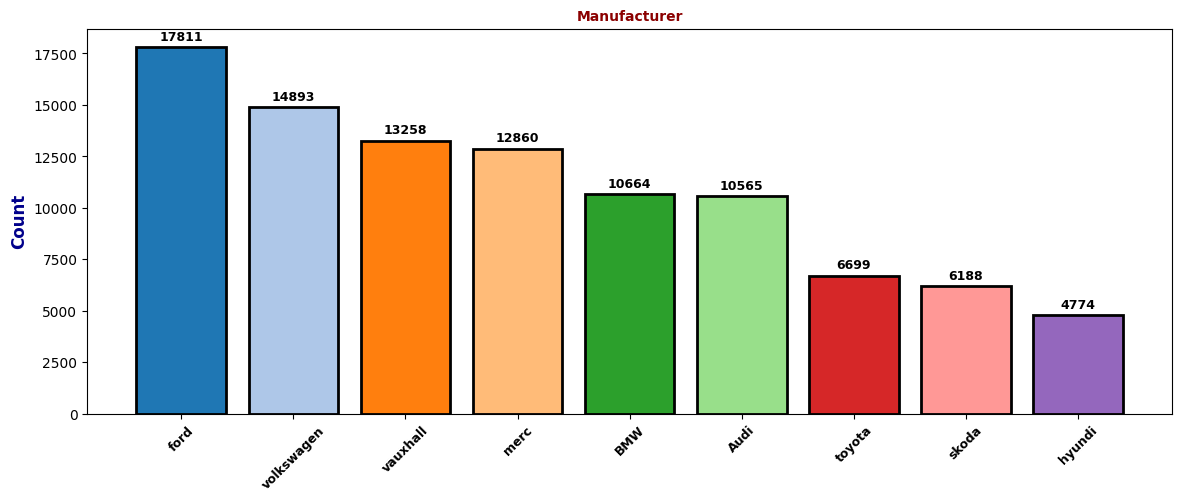

In [34]:
cols = [0, 1, 2, 3]

for i in cols:

        if i == 0:

            fig,ax = plt.subplots(figsize=(14,5))

            df_name = df[cat_cols[0]].value_counts().to_frame().head(10)

            values = df_name.iloc[:,0]
            labels = df_name.index.to_list()
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))

            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[0]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')
            autolabel(rects) # we label our bars.

            fig.show()
            
        else:
            
            fig,ax = plt.subplots(figsize=(14,5))

            df_name = df[cat_cols[i]].value_counts().to_frame().head(10)

            values = df_name.iloc[:,0]
            labels = df_name.index.to_list()
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))

            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[i]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()

#### Correlation of Data

<Axes: >

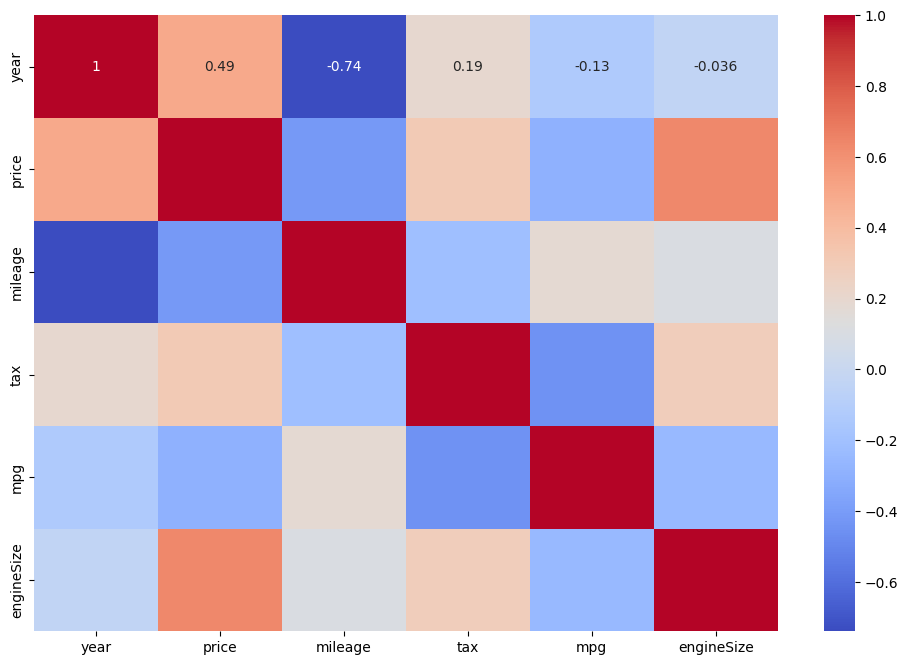

In [58]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Documents\spring 1403\Data Science\CA\Data-Science\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\D

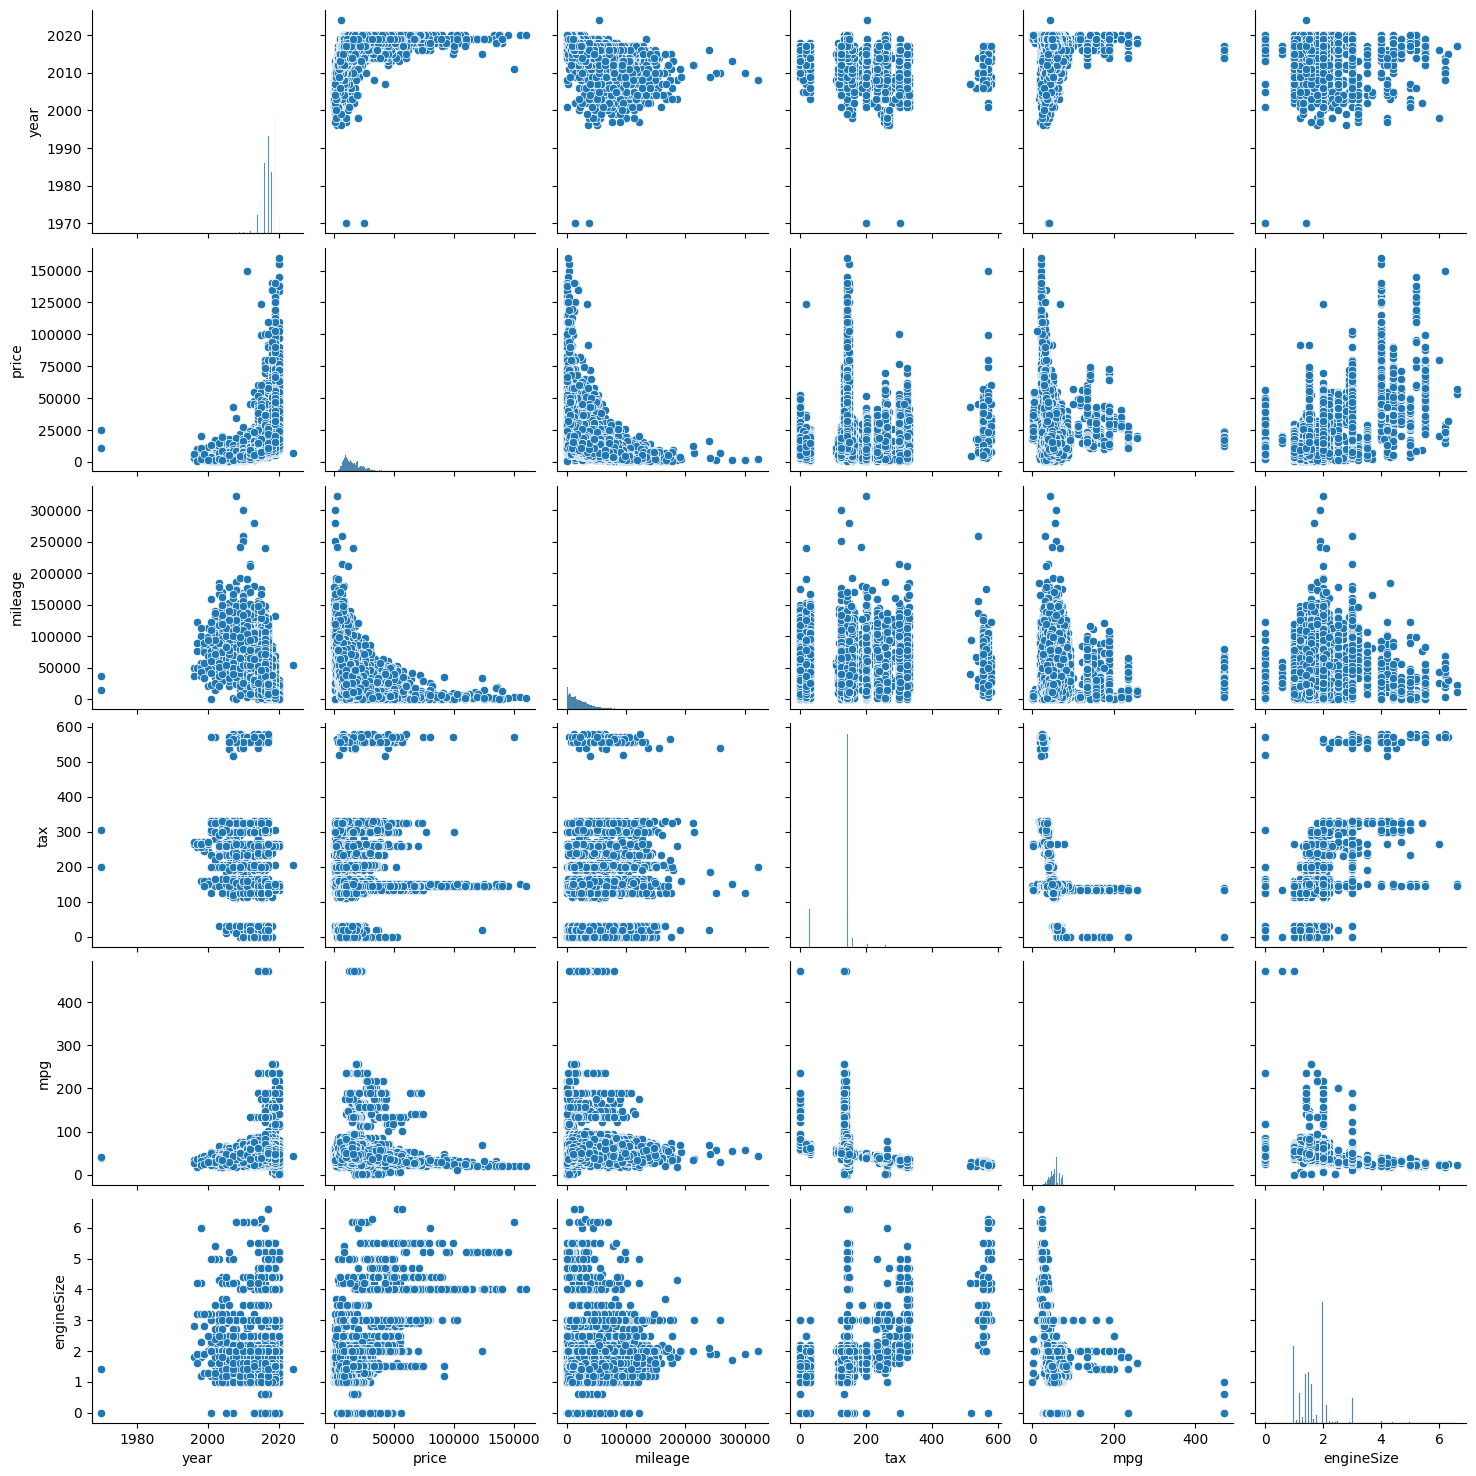

In [59]:
sns.pairplot(df[num_cols])
plt.show()


#### Price

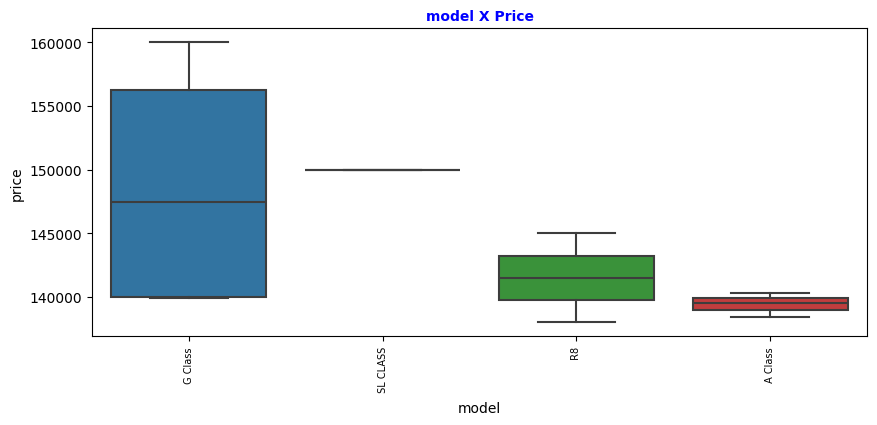

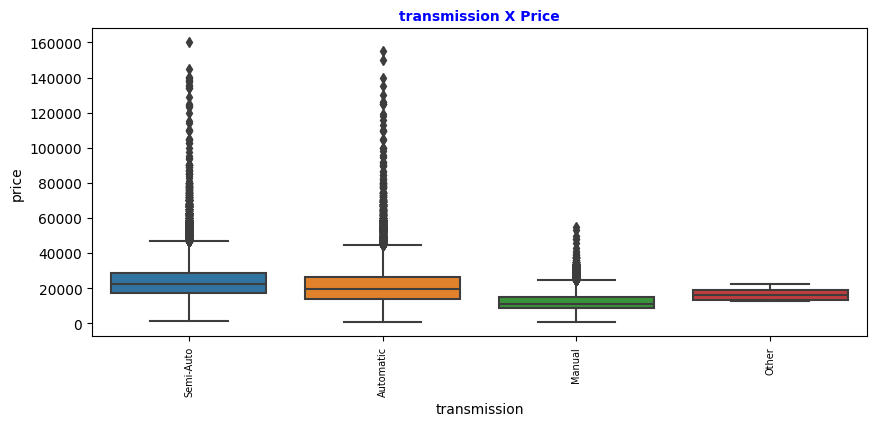

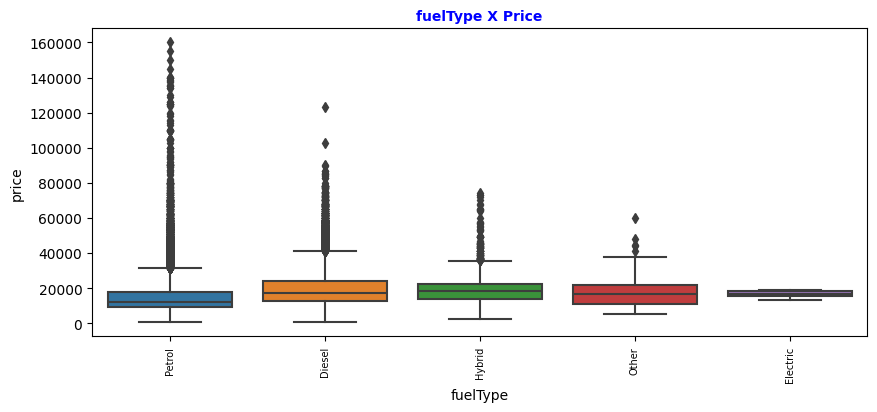

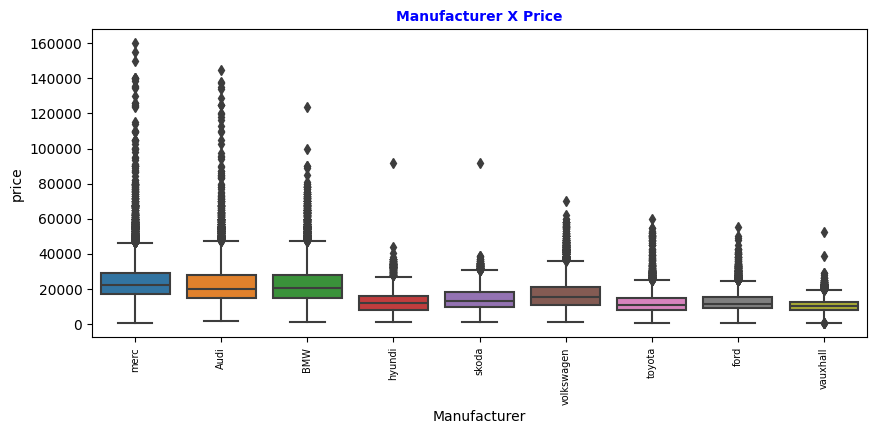

In [61]:
cols = [0, 1, 2, 3]

df_top = df.sort_values(["price"], axis=0, ascending=False)

for i in cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 0:
                sns.boxplot(x = 'model', y = 'price', data = df_top.head(10))
                ax.set_title(f"{cat_cols[i]}" + " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

        else:
                sns.boxplot(x = cat_cols[i], y = 'price', data = df_top)
                ax.set_title(f"{cat_cols[i]}"+ " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

In [62]:
def plot_avg_price(col):
    plt.figure(figsize=(14, 8))
    ax = df.groupby( col)['price'].mean().plot(kind='bar', color=sns.color_palette("Spectral"))

    ax.set_title(f'Average Price by {col}', fontsize=16)
    ax.set_xlabel( col, fontsize=14)
    ax.set_ylabel('Average Price', fontsize=14)

    plt.xticks(rotation=0)

    for p in ax.patches:
        ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        

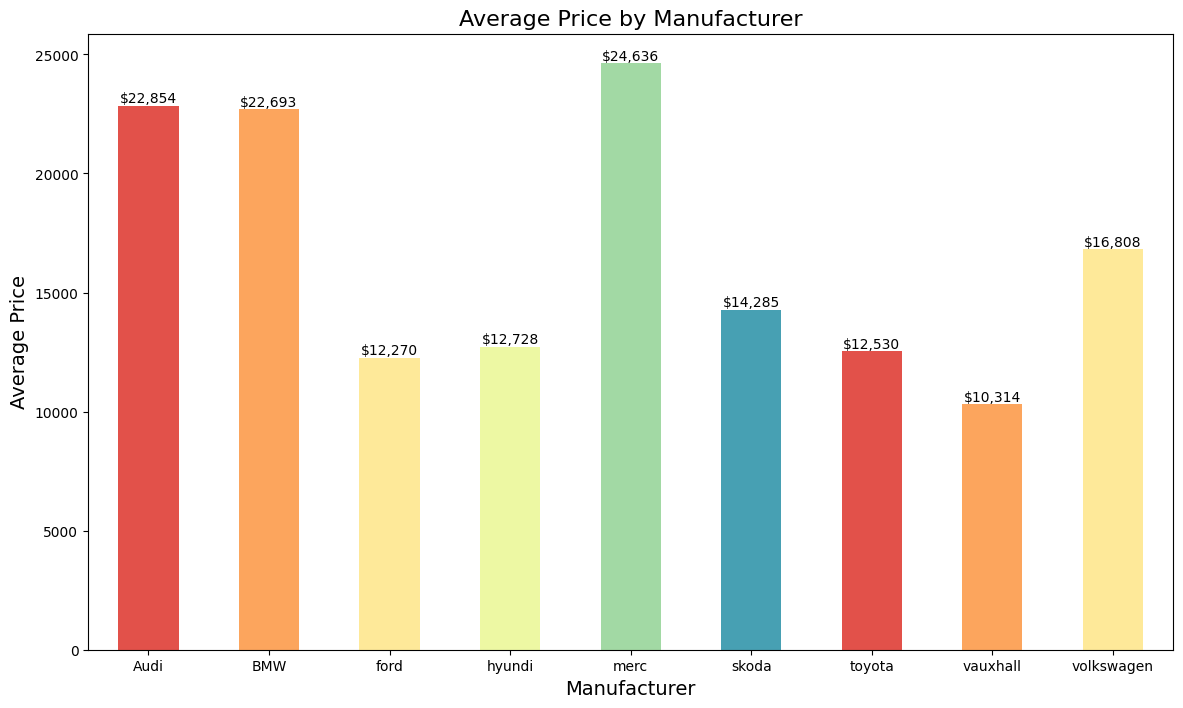

In [48]:
plot_avg_price('Manufacturer')

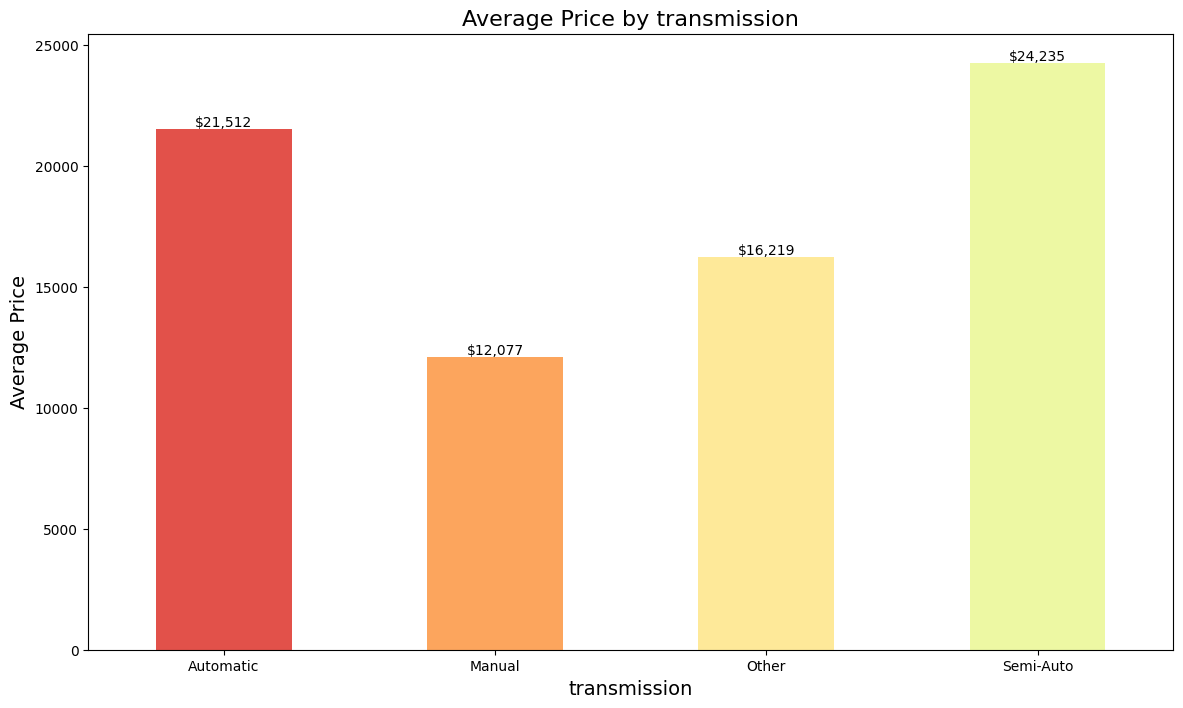

In [50]:
plot_avg_price('transmission')

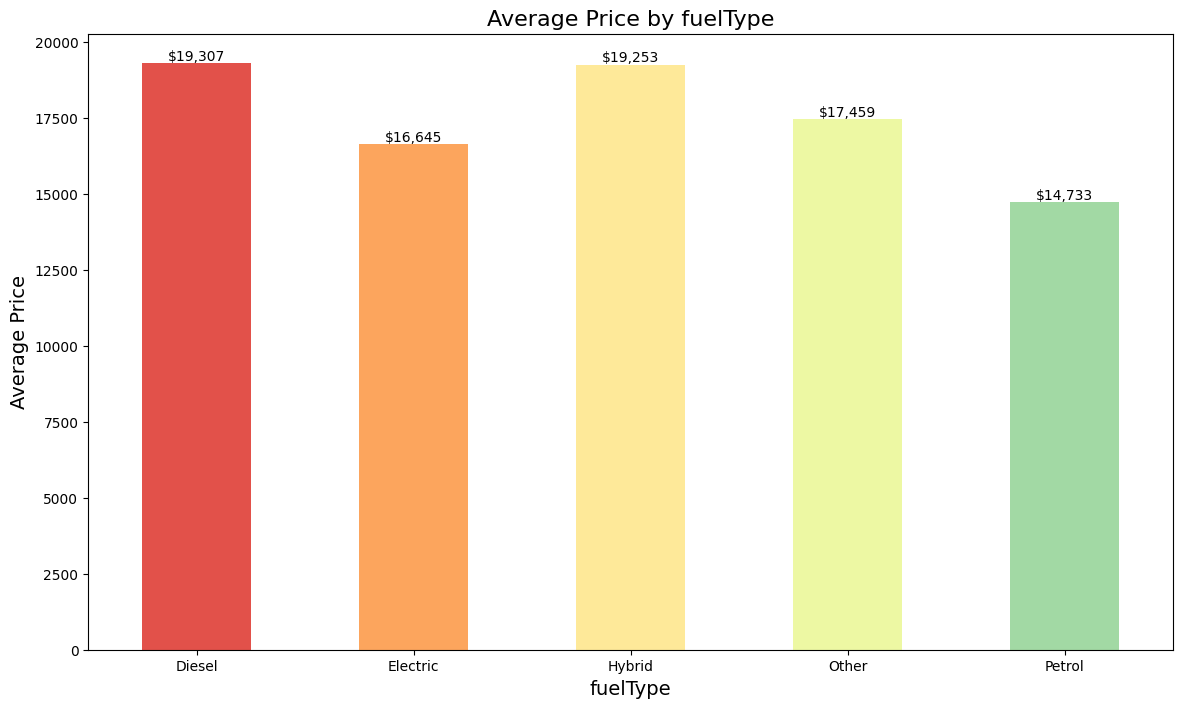

In [51]:
plot_avg_price('fuelType')

#### Year

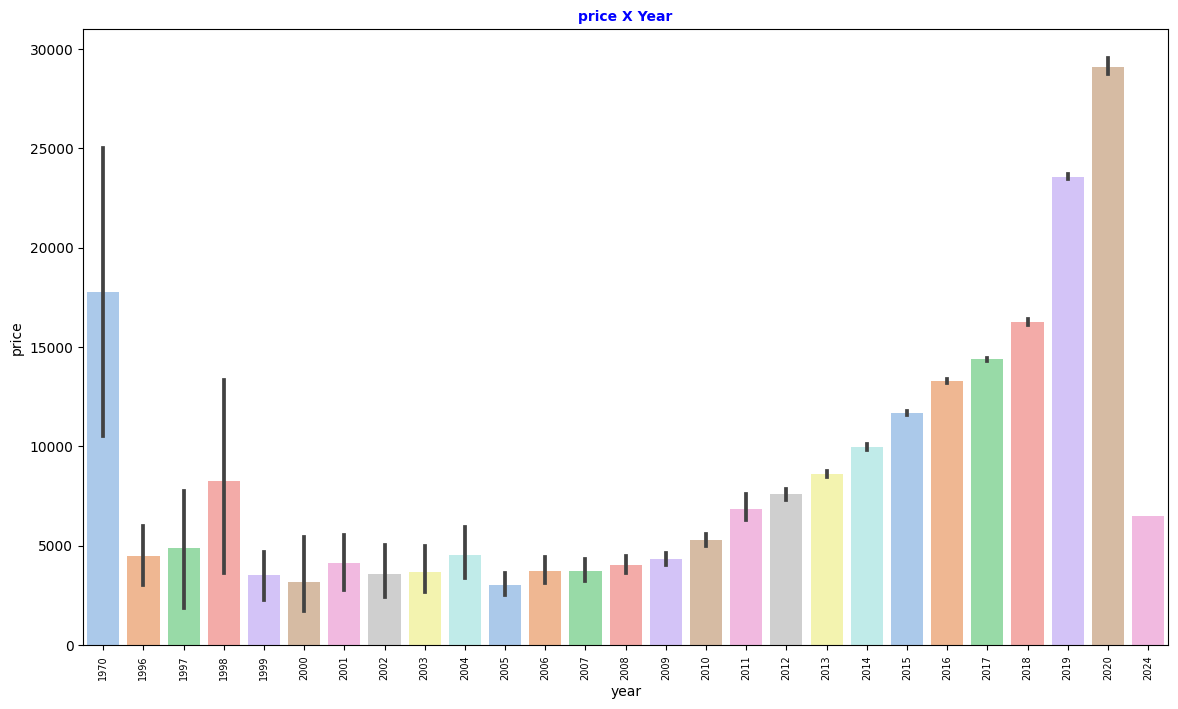

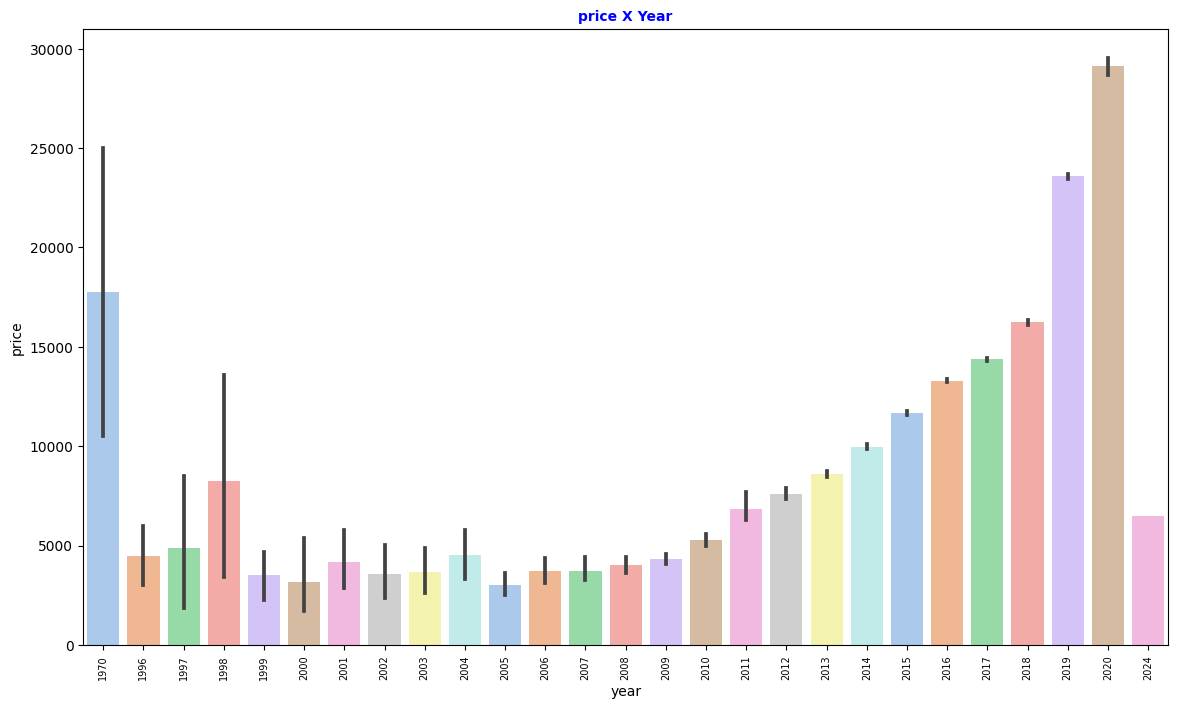

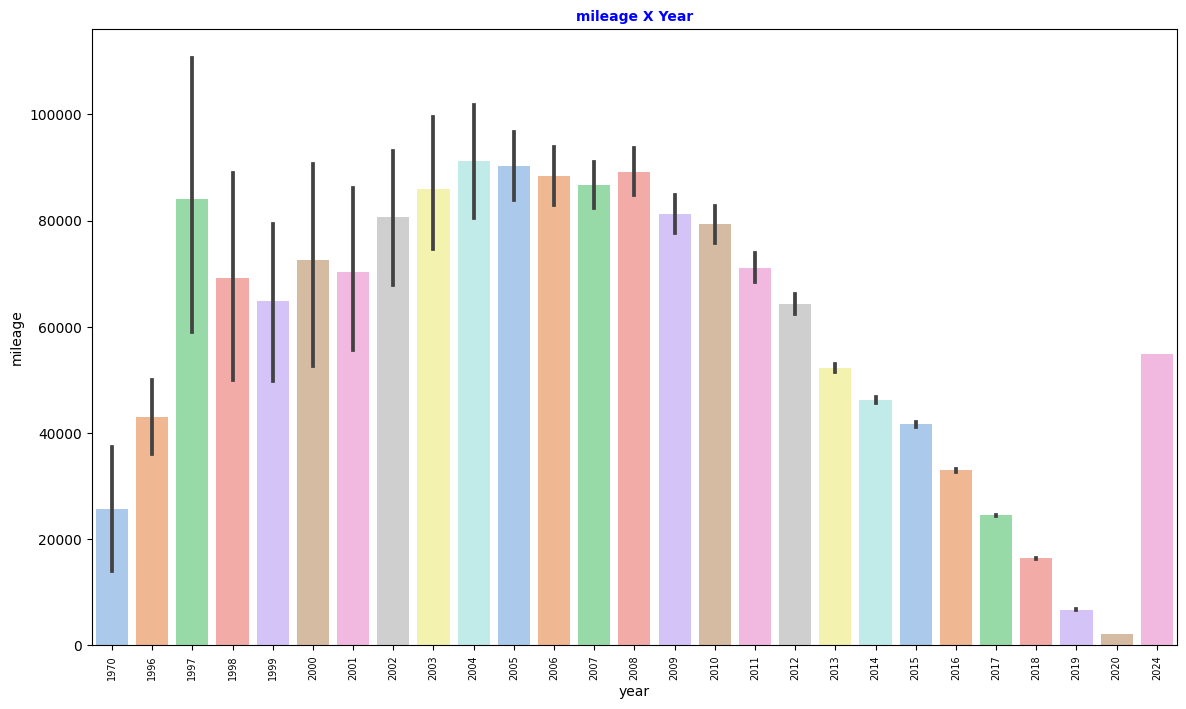

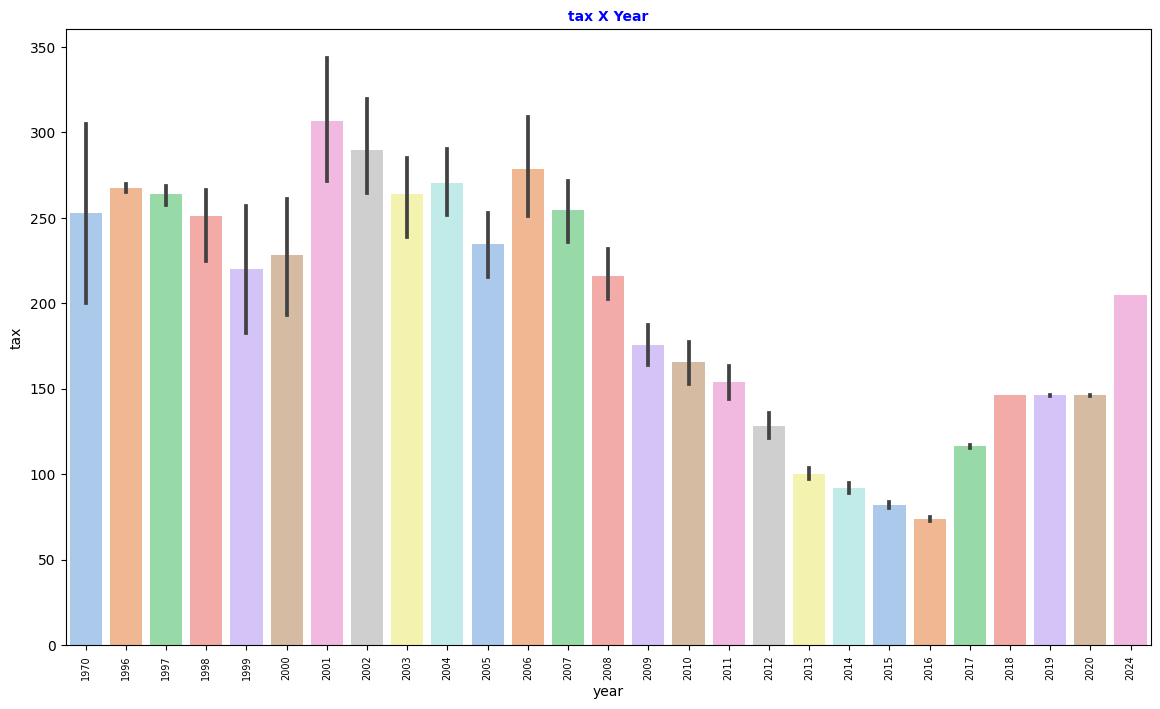

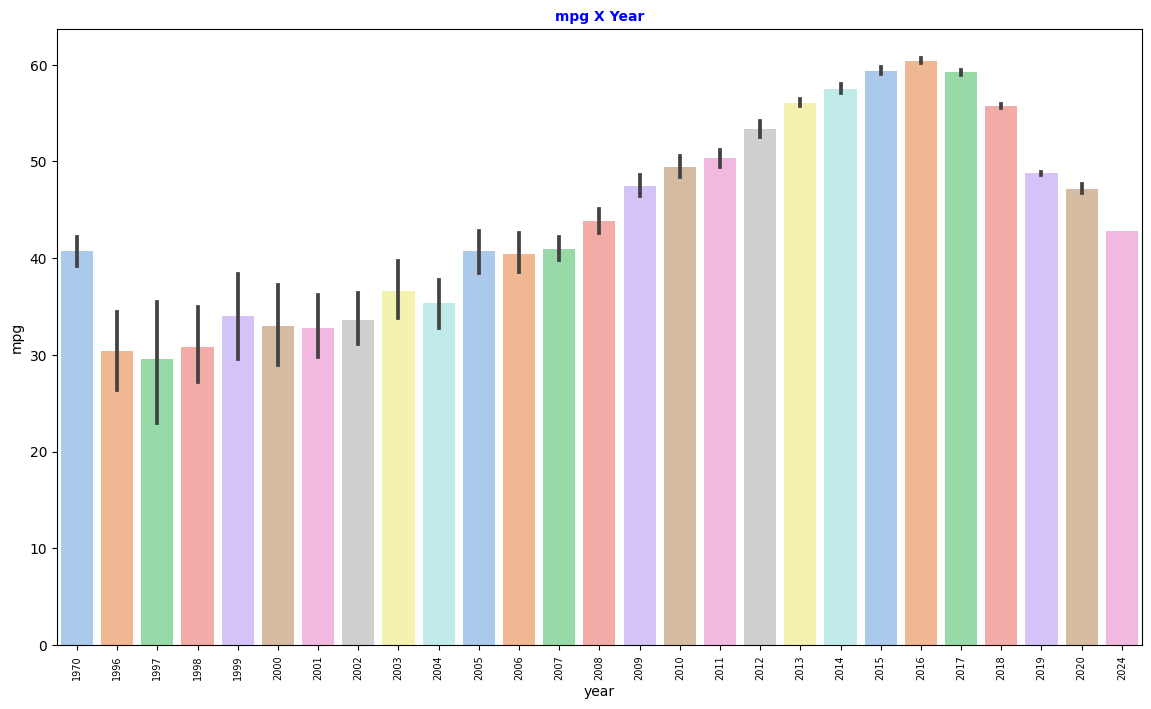

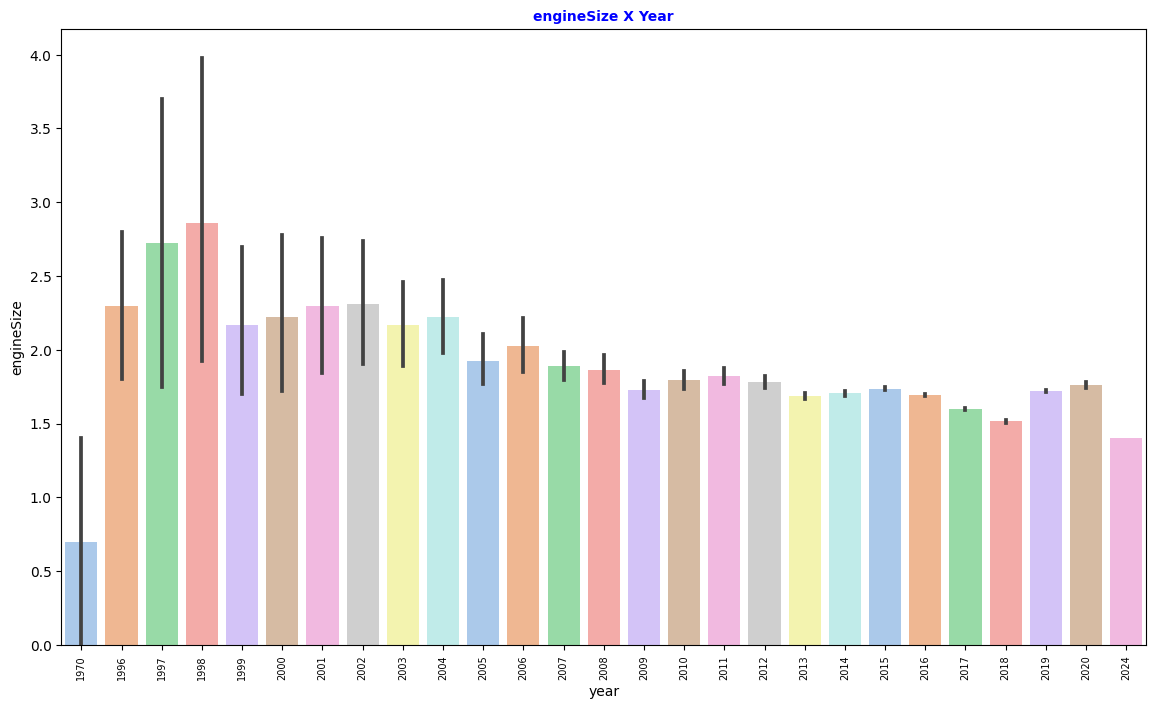

In [60]:
for i in num_cols:
        fig, ax = plt.subplots(figsize=(14, 8))

        if i == 'year':
            sns.barplot(data=df, x = 'year', y = 'price', palette="pastel")
            ax.set_title('price'  + " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()
        else:
            sns.barplot(data=df, x = 'year', y = i, palette="pastel")
            ax.set_title(f"{i}"+ " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()

#### Percentage of Each Fuel Type Over the Years

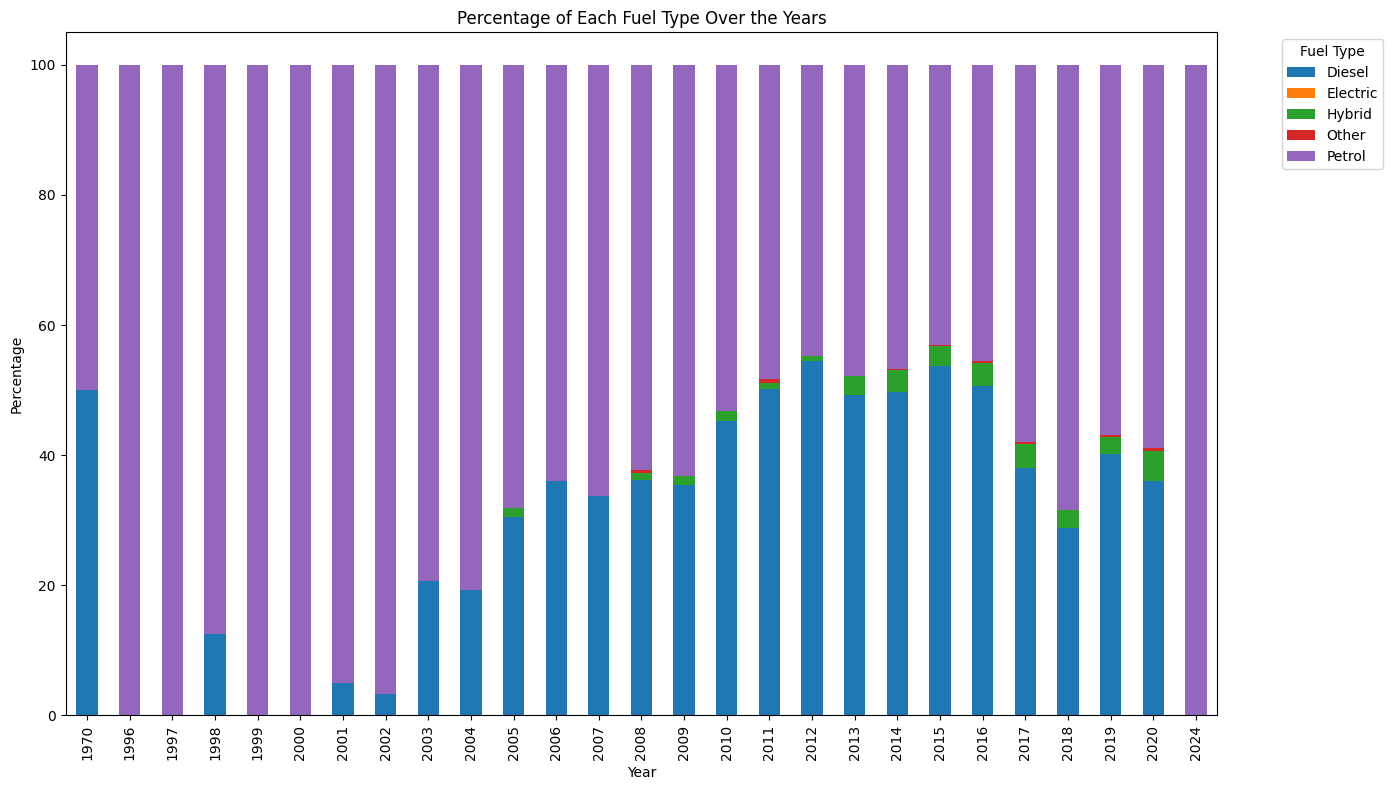

In [69]:
fuel_count = df.groupby(['year', 'fuelType']).size().reset_index(name='count')

total_count_per_year = fuel_count.groupby('year')['count'].transform('sum')

fuel_count['percent'] = (fuel_count['count'] / total_count_per_year) * 100

pivot_table = pd.pivot_table(fuel_count, values='percent', index='year', columns='fuelType', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Percentage of Each Fuel Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Percentage of Each Manufacturer Over the Years

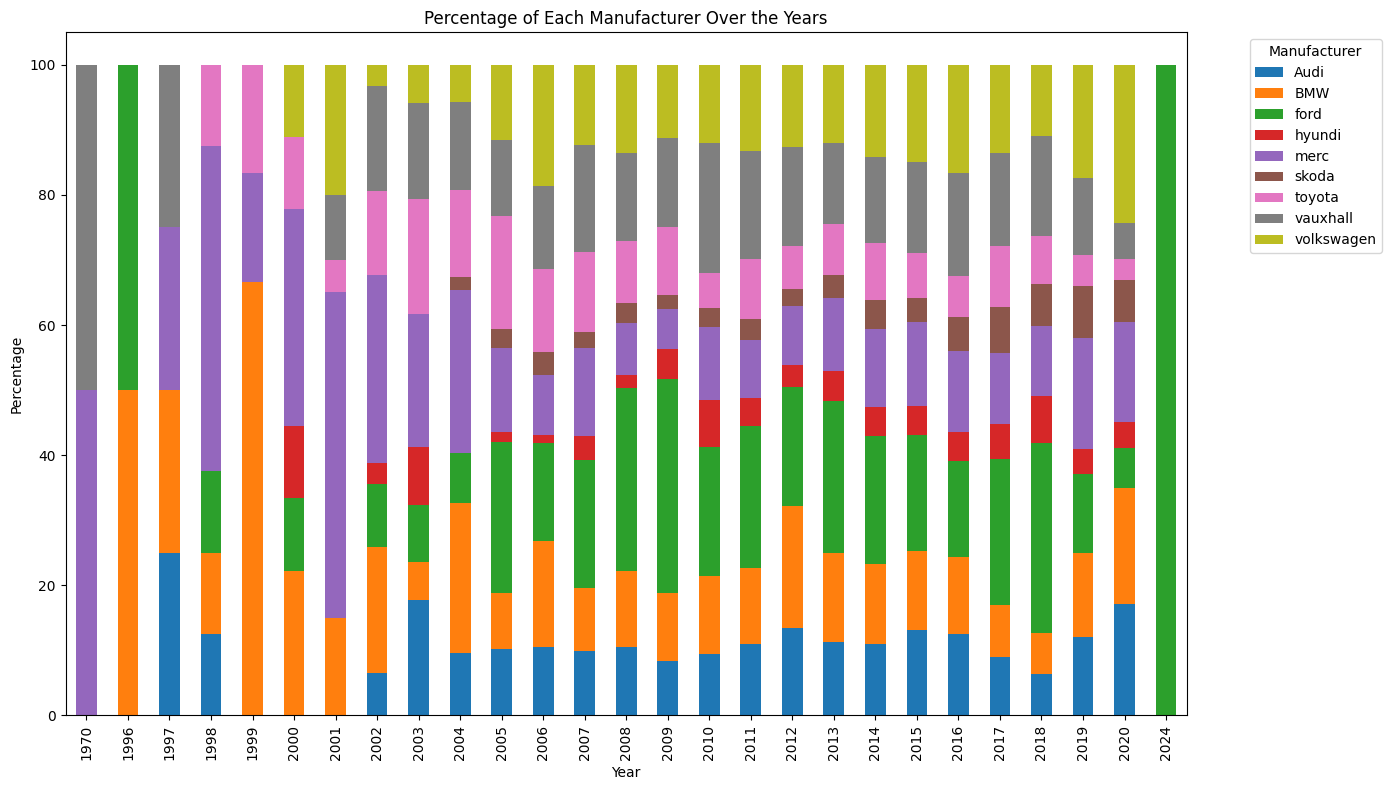

In [71]:
fuel_count = df.groupby(['year', 'Manufacturer']).size().reset_index(name='count')

total_count_per_year = fuel_count.groupby('year')['count'].transform('sum')

fuel_count['percent'] = (fuel_count['count'] / total_count_per_year) * 100

pivot_table = pd.pivot_table(fuel_count, values='percent', index='year', columns='Manufacturer', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Percentage of Each Manufacturer Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Percentage of Each transmission Over the Years

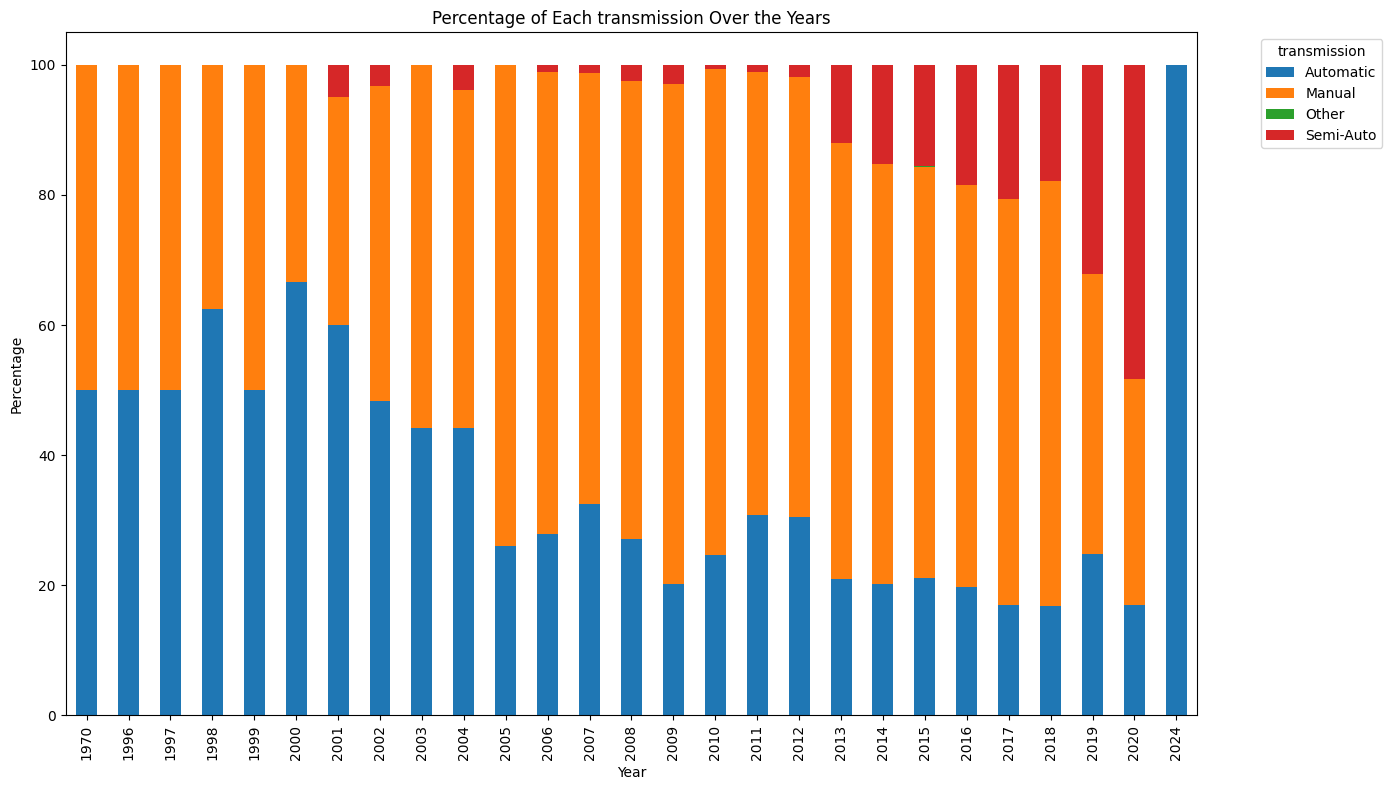

In [74]:
fuel_count = df.groupby(['year', 'transmission']).size().reset_index(name='count')

total_count_per_year = fuel_count.groupby('year')['count'].transform('sum')

fuel_count['percent'] = (fuel_count['count'] / total_count_per_year) * 100

pivot_table = pd.pivot_table(fuel_count, values='percent', index='year', columns='transmission', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Percentage of Each transmission Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()